In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
from sklearn.model_selection import train_test_split
%run gmst数据.ipynb

ModuleNotFoundError: No module named 'mglearn'

In [7]:
GMST = pd.read_csv("GMST.csv",header=None)
datas = pd.date_range("1880-1",periods=1736,freq="MS")
datas
GMST.index = datas
GMST.columns=["GMST"]
GMST

,GMST
1880-01-01,-0.25056
1880-02-01,-0.34636
1880-03-01,-0.13468
1880-04-01,-0.21151
1880-05-01,-0.13327
...,...
2024-04-01,1.32010
2024-05-01,1.15760
2024-06-01,1.22760
2024-07-01,1.22940


In [8]:
GMST1 = GMST["1950":"2022"]
GMST1

,GMST
1950-01-01,-0.282360
1950-02-01,-0.292390
1950-03-01,-0.072244
1950-04-01,-0.211210
1950-05-01,-0.129560
...,...
2022-08-01,0.972450
2022-09-01,0.903820
2022-10-01,1.000700
2022-11-01,0.736360


In [31]:
DMI = pd.read_table("DMI.txt",sep=r'\s+',header=None)
AO = pd.read_table("AO.txt",sep=r'\s+',header=None)
AMON=pd.read_table("AMON.txt",sep=r'\s+',header=None)
NAO=pd.read_table("NAO.txt",sep=r'\s+',header=None)
NINO=pd.read_table("NINO.txt",sep=r'\s+',header=None)
PDO=pd.read_table("PDO.txt",sep=r'\s+',header=None)

In [33]:
index= pd.date_range('1/1/1950',periods=73*12,freq='MS')

In [35]:
NAO=NAO.iloc[:,:-1]

In [37]:
NINO

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1950,-1.5,-1.3,-1.2,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8
1,1951,-0.8,-0.5,-0.2,0.2,0.4,0.6,0.7,0.9,1.0,1.2,1.0,0.8
2,1952,0.5,0.4,0.3,0.3,0.2,0.0,-0.1,0.0,0.2,0.1,0.0,0.1
3,1953,0.4,0.6,0.6,0.7,0.8,0.8,0.7,0.7,0.8,0.8,0.8,0.8
4,1954,0.8,0.5,0.0,-0.4,-0.5,-0.5,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2018,-0.9,-0.9,-0.7,-0.5,-0.2,0.0,0.1,0.2,0.5,0.8,0.9,0.8
69,2019,0.7,0.7,0.7,0.7,0.5,0.5,0.3,0.1,0.2,0.3,0.5,0.5
70,2020,0.5,0.5,0.4,0.2,-0.1,-0.3,-0.4,-0.6,-0.9,-1.2,-1.3,-1.2
71,2021,-1.0,-0.9,-0.8,-0.7,-0.5,-0.4,-0.4,-0.5,-0.7,-0.8,-1.0,-1.0


In [39]:
def reshape_and_transpose(df):
    df = df.iloc[:, 1:]  # 去掉第一列
    zeros = np.zeros((876, 1))  # 创建876x1的零矩阵
    df1 = pd.DataFrame(zeros)
    df1 = df.copy()  # 覆盖为原始数据（去掉第一列后的）
    reshaped = df1.to_numpy().reshape(1, -1)  # 转换成1行的数组
    return pd.DataFrame(reshaped).transpose()  # 转置为单列DataFrame



In [41]:
# 对所有数据集执行处理

AO = reshape_and_transpose(AO)
AMON = reshape_and_transpose(AMON)
NAO = reshape_and_transpose(NAO)
NINO = reshape_and_transpose(NINO)
PDO = reshape_and_transpose(PDO)


In [43]:
NINO

,0
0,-1.5
1,-1.3
2,-1.2
3,-1.2
4,-1.1
...,...
871,-0.9
872,-1.0
873,-1.0
874,-0.9


In [45]:
DMI = DMI.iloc[:,1]

In [47]:
tra = np.zeros((876,1))
num = GMST2.index[dydtindex.iloc[:,0]+1]
num

NameError: name 'GMST2' is not defined

In [49]:
name = ["DMI","AO","AMON","NAO","NINO","PDO"]
tes = np.zeros((876,6))

In [51]:
tes = pd.concat([DMI,AO,AMON,NAO,NINO,PDO],axis=1)
tes.columns = name
data = tes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import signal

In [16]:
data = pd.read_csv("data1.csv",index_col=0)
data.index = GMST1.index
data = pd.concat([data,GMST1],names=[data.columns,GMST],axis=1)
data

,DMI,AO,AMON,NAO,NINO,PDO,GMST
1950-01-01,-0.044,-0.060,0.105,0.55,-1.5,-1.61,-0.282360
1950-02-01,-0.554,0.627,-0.040,3.31,-1.3,-2.17,-0.292390
1950-03-01,-0.692,-0.008,-0.112,0.82,-1.2,-1.89,-0.072244
1950-04-01,-0.475,0.555,-0.137,1.61,-1.2,-1.99,-0.211210
1950-05-01,-0.309,0.072,-0.065,-1.73,-1.1,-3.19,-0.129560
...,...,...,...,...,...,...,...
2022-08-01,-0.246,-0.170,0.358,-1.70,-0.9,-2.38,0.972450
2022-09-01,-0.322,-0.655,0.662,-3.73,-1.0,-2.29,0.903820
2022-10-01,-0.691,1.346,0.483,0.86,-1.0,-1.81,1.000700
2022-11-01,-0.269,0.339,0.282,2.37,-0.9,-2.41,0.736360


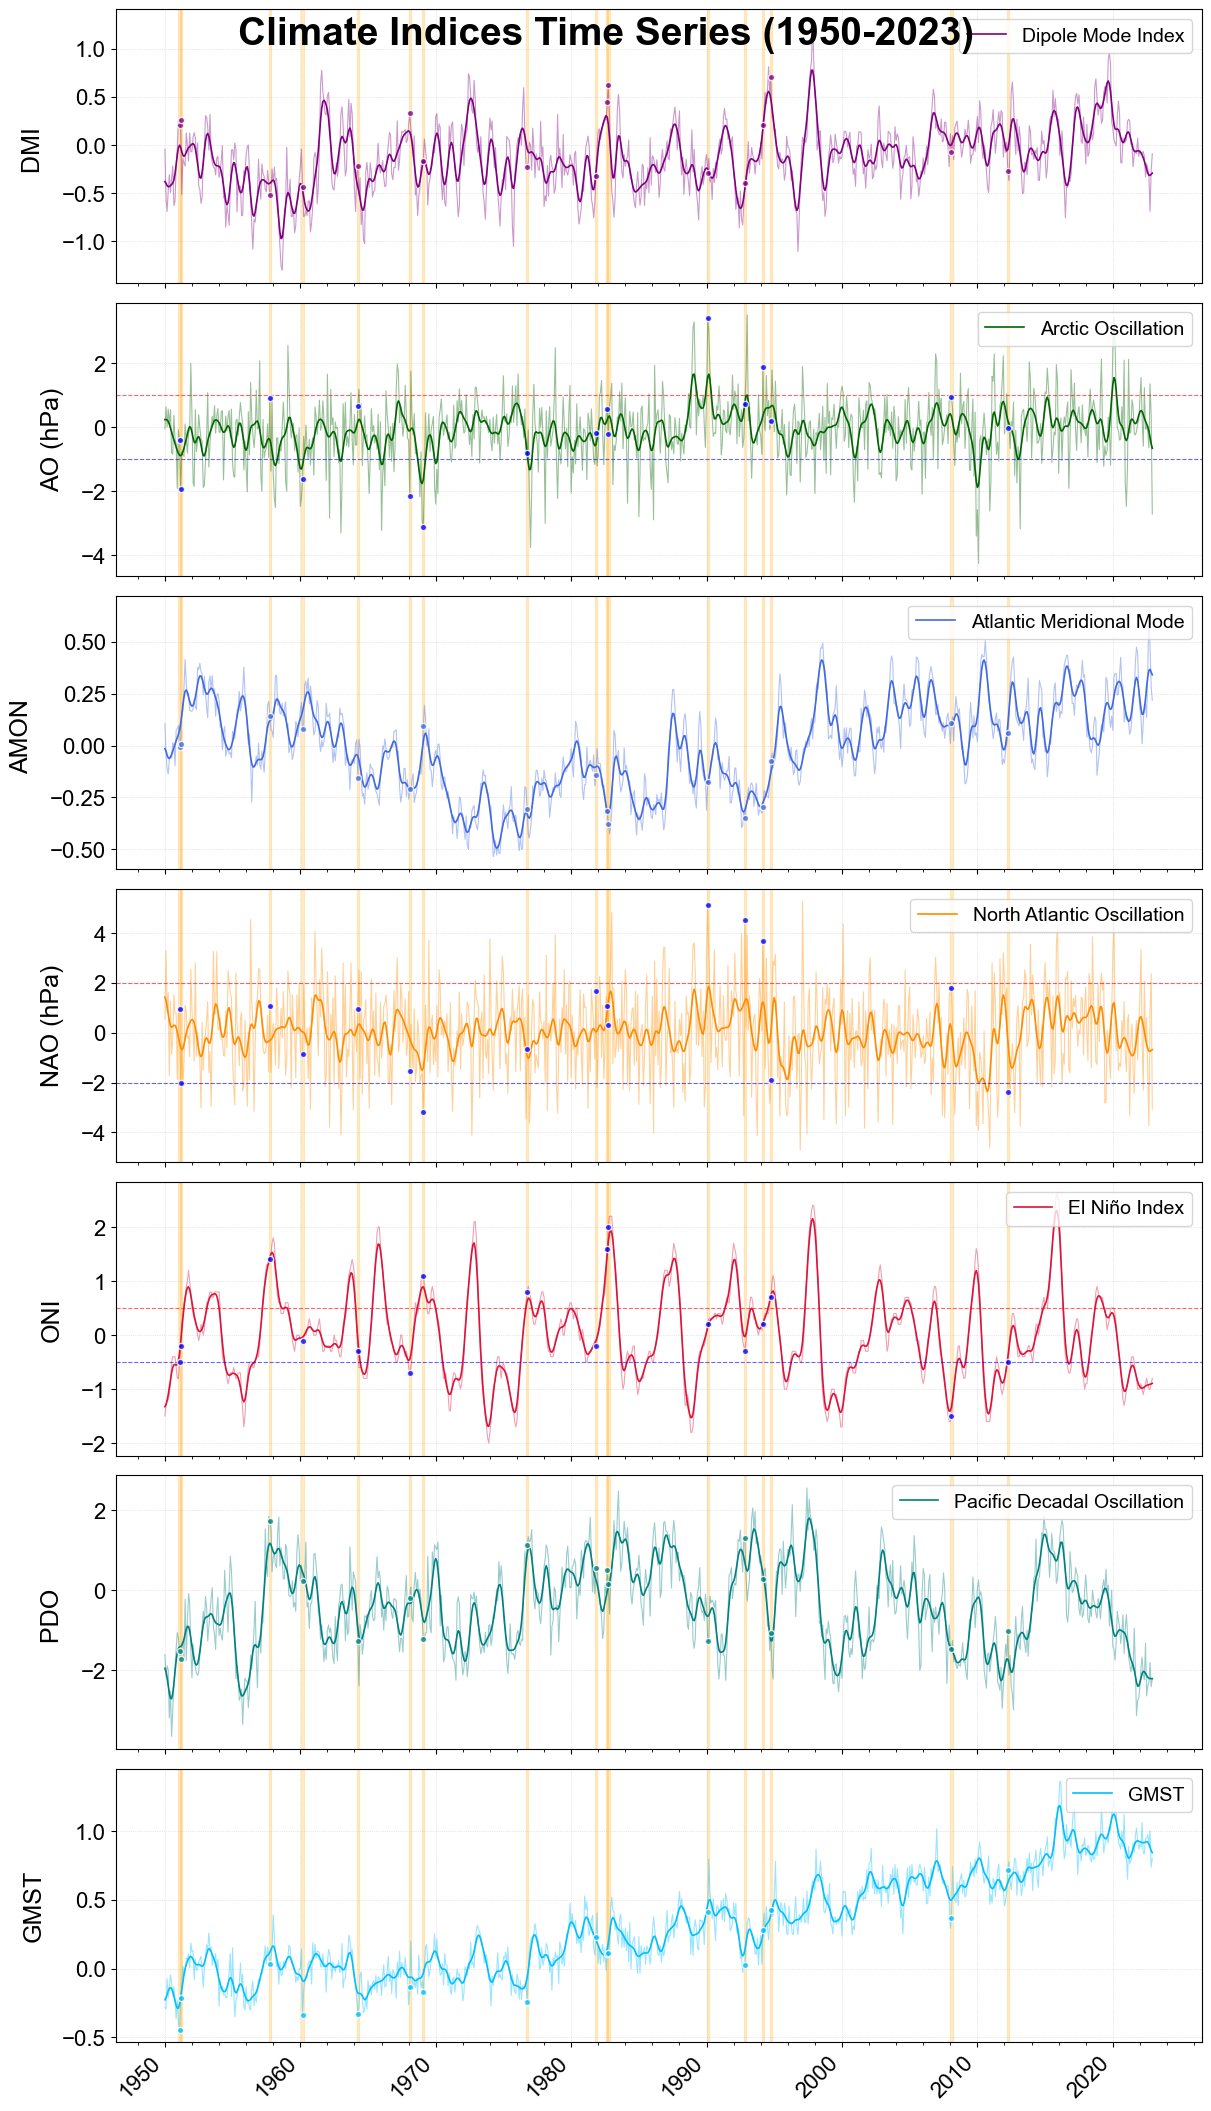

In [21]:
# 生成时间索引 (假设从1950年1月开始)
dates = pd.date_range("1950-01", periods=876, freq="MS")
data.index = dates
GMST1.index = dates
# =====================================
# 2. 滤波函数定义
# =====================================
def high_pass_filter(series, cutoff=1/120):
    b, a = signal.butter(4, cutoff, btype='high', fs=12)
    return signal.filtfilt(b, a, series)

def trenberth_smooth(series):
    if np.all(np.isnan(series)):
        return series
    
    valid_mask = ~np.isnan(series)
    ts0 = series[valid_mask]
    
    if len(ts0) == 0:
        return series
    
    weights = np.array([1,6,19,42,71,96,106,96,71,42,19,6,1]) / 576
    pad_size = len(weights) // 2  # 计算填充大小

    # 处理填充
    front_pad = ts0[:pad_size][::-1] if len(ts0) >= pad_size else ts0[::-1]
    end_pad = ts0[-pad_size:][::-1] if len(ts0) >= pad_size else ts0[::-1]
    
    ts_padded = np.concatenate([front_pad, ts0, end_pad])
    
    # 使用 'same' 模式保持输出长度一致
    smoothed = np.convolve(ts_padded, weights, mode='same')
    
    # 仅取回原始数据长度部分
    smoothed = smoothed[pad_size:-pad_size] if len(smoothed) > len(ts0) else smoothed

    smoothed_series = np.full_like(series, np.nan)
    smoothed_series[valid_mask] = smoothed
    
    return smoothed_series

data_filtered = data.apply(high_pass_filter)
data_smoothed = data.apply(trenberth_smooth)

# =====================================
# 3. 可视化设置
# =====================================
plt.rcParams.update({
    'font.sans-serif': 'Arial',
    'axes.labelsize': 18,
    'xtick.labelsize':16 ,
    'ytick.labelsize': 16,
    'axes.titlesize': 20,
    'figure.constrained_layout.use': True
})

fig, axes = plt.subplots(7, 1, figsize=(12, 21), sharex=True,
                        gridspec_kw={'hspace': 0.05})

# =====================================
# 4. 绘制各指数子图
# =====================================
def plot_climate_index(ax, series, color, label, ylabel, thresholds=None, highlight_indices=None):
    # 绘制原始数据
    ax.plot(series.index, series, color=color, lw=0.8, alpha=0.4)
    # 绘制平滑数据
    ax.plot(series.index, trenberth_smooth(series), 
           color=color, lw=1.2, label=label)
    
    # 标注阈值事件
    if thresholds:
        for threshold, color in thresholds.items():
            ax.axhline(threshold, color=color, ls='--', lw=0.8, alpha=0.6)
    
    # 新增：在指定位置添加点标记
    if highlight_indices is not None:
        # 获取时间点和对应的值
        highlight_dates = series.index[highlight_indices]
        highlight_values = series.iloc[highlight_indices]
        ax.scatter(highlight_dates, highlight_values, 
                   color=color, s=20, edgecolor='white', zorder=3, alpha=0.8)

    ax.set_ylabel(ylabel, labelpad=12)
    ax.grid(ls=':', lw=0.5, alpha=0.6)
    ax.legend(loc='upper right', fontsize=14)
highlight_indices = np.array( [13, 14, 93, 122, 171, 217, 229, 321, 382, 392, 393, 481, 514, 530, 537, 697, 747])
plot_climate_index(axes[6],GMST1.GMST,'deepskyblue',"GMST","GMST", highlight_indices=highlight_indices)
    
# DMI
plot_climate_index(axes[0], data.DMI, 'purple', 
                  'Dipole Mode Index', 'DMI ', highlight_indices=highlight_indices)

# AO
plot_climate_index(axes[1], data.AO, 'darkgreen', 
                  'Arctic Oscillation', 'AO (hPa)',
                  thresholds={1.0: 'red', -1.0: 'blue'}, highlight_indices=highlight_indices)

# AMON
plot_climate_index(axes[2], data.AMON, 'royalblue', 
                  'Atlantic Meridional Mode', 'AMON ', highlight_indices=highlight_indices)

# NAO
plot_climate_index(axes[3], data.NAO, 'darkorange', 
                  'North Atlantic Oscillation', 'NAO (hPa)',
                  thresholds={2.0: 'red', -2.0: 'blue'}, highlight_indices=highlight_indices)

# NINO3.4
plot_climate_index(axes[4], data.NINO, 'crimson', 
                  'El Niño Index', 'ONI',
                  thresholds={0.5: 'red', -0.5: 'blue'}, highlight_indices=highlight_indices)

# PDO
plot_climate_index(axes[5], data.PDO, 'teal', 
                  'Pacific Decadal Oscillation', 'PDO ', highlight_indices=highlight_indices)

# =====================================
# 5. 坐标轴格式调整
# =====================================
axes[-1].xaxis.set_major_locator(mdates.YearLocator(10))
axes[-1].xaxis.set_minor_locator(mdates.YearLocator(2))
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.setp(axes[-1].get_xticklabels(), rotation=45, ha='right')


datess = pd.date_range(start="1950-01-01", periods=876, freq="MS")

# 输入的索引数组
indices = np.array( [13, 14, 93, 122, 171, 217, 229, 321, 382, 392, 393, 481, 514, 530, 537, 697, 747])

# 转换为时间点并生成三个月范围
timestamps = datess[indices]
time_ranges = []
for ts in timestamps:
    start = ts - pd.DateOffset(months=1) if ts > datess[0] else ts
    end = ts + pd.DateOffset(months=1) if ts < datess[-1] else ts
    time_ranges.append((start, end))

# 绘制所有区域
for start, end in time_ranges:
    for ax in axes:
        ax.axvspan(start, end, color="orange", alpha=0.2, zorder=0)

# =====================================
# 6. 保存与显示
# =====================================
plt.suptitle("Climate Indices Time Series (1950-2023)", y=0.995, 
            fontsize=28, fontweight='bold')
plt.savefig('climate_indices.png', dpi=300, bbox_inches='tight')
plt.show()

In [67]:
GMST1
data1 = data.copy()

In [69]:
data1.index = GMST1.index

In [71]:
data1

,DMI,AO,AMON,NAO,NINO,PDO
1950-01-01,-0.044,-0.060,0.105,0.55,-1.5,-1.61
1950-02-01,-0.554,0.627,-0.040,3.31,-1.3,-2.17
1950-03-01,-0.692,-0.008,-0.112,0.82,-1.2,-1.89
1950-04-01,-0.475,0.555,-0.137,1.61,-1.2,-1.99
1950-05-01,-0.309,0.072,-0.065,-1.73,-1.1,-3.19
...,...,...,...,...,...,...
2022-08-01,-0.246,-0.170,0.358,-1.70,-0.9,-2.38
2022-09-01,-0.322,-0.655,0.662,-3.73,-1.0,-2.29
2022-10-01,-0.691,1.346,0.483,0.86,-1.0,-1.81
2022-11-01,-0.269,0.339,0.282,2.37,-0.9,-2.41


In [98]:
data1.to_csv('data1.csv')

In [73]:
name

['DMI', 'AO', 'AMON', 'NAO', 'NINO', 'PDO']

In [120]:
data1 = pd.concat([data1,dgmst30.loc[GMST1.index],lei],axis = 1)
data1

,DMI,AO,AMON,NAO,NINO,PDO,dgmst,isor,dgmst,isor
1950-01-01,-0.044,-0.060,0.105,0.55,-1.5,-1.61,0.068543,0.0,0.068543,0.0
1950-02-01,-0.554,0.627,-0.040,3.31,-1.3,-2.17,0.056192,0.0,0.056192,0.0
1950-03-01,-0.692,-0.008,-0.112,0.82,-1.2,-1.89,0.031011,0.0,0.031011,0.0
1950-04-01,-0.475,0.555,-0.137,1.61,-1.2,-1.99,0.101427,0.0,0.101427,0.0
1950-05-01,-0.309,0.072,-0.065,-1.73,-1.1,-3.19,0.010594,0.0,0.010594,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,-0.246,-0.170,0.358,-1.70,-0.9,-2.38,0.001984,0.0,0.001984,0.0
2022-09-01,-0.322,-0.655,0.662,-3.73,-1.0,-2.29,-0.110009,0.0,-0.110009,0.0
2022-10-01,-0.691,1.346,0.483,0.86,-1.0,-1.81,-0.091534,0.0,-0.091534,0.0
2022-11-01,-0.269,0.339,0.282,2.37,-0.9,-2.41,0.072069,0.0,0.072069,0.0


In [116]:
std_1_99 = 1.99*std.item()
data2 = data1.loc[(dgmst30>=std_1_99).any(axis = 1)]

In [79]:
data2.shape

(17, 6)

In [110]:
dgmst30.to_csv('dgmst30.csv')

# 01 Coff

In [118]:
lei = np.zeros([876,1])
lei = pd.DataFrame(lei,index=data1.index,columns=['isor'])
lei.loc[(dgmst30>=std_1_99).any(axis = 1)] = 1
lei.loc[(dgmst30>=std_1_99).any(axis = 1)]

,isor
1951-02-01,1.0
1951-03-01,1.0
1957-11-01,1.0
1960-03-01,1.0
1964-04-01,1.0
1968-01-01,1.0
1969-02-01,1.0
1976-10-01,1.0
1981-10-01,1.0
1982-10-01,1.0


## 绘制相关系矩阵

In [88]:
cc = np.corrcoef(data1,rowvar=False)

In [98]:
import seaborn as sns
cc = np.corrcoef(data1,rowvar=False)
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(
    cc,
    ax=ax,  # 指定主绘图区域
    cbar_ax=fig.add_axes([0.92, 0.1, 0.03, 0.8]),  # 手动设置颜色条位置 [左, 下, 宽, 高]
    vmax=1,
    vmin=-1,
    annot=True,
    linewidths=1,
    cmap="coolwarm",
    square=True,
    fmt='.2f',
    cbar_kws={'shrink': 0.8},
)
plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.xticks(rotation=45)    # x轴标签旋转45度
plt.yticks(rotation=0)     # y轴标签不旋转
ax.set_xticklabels(name, rotation=45, ha='right')
ax.set_yticklabels(name, rotation=0)


plt.show()


RuntimeError: Colorbar layout of new layout engine not compatible with old engine, and a colorbar has been created.  Engine not changed.

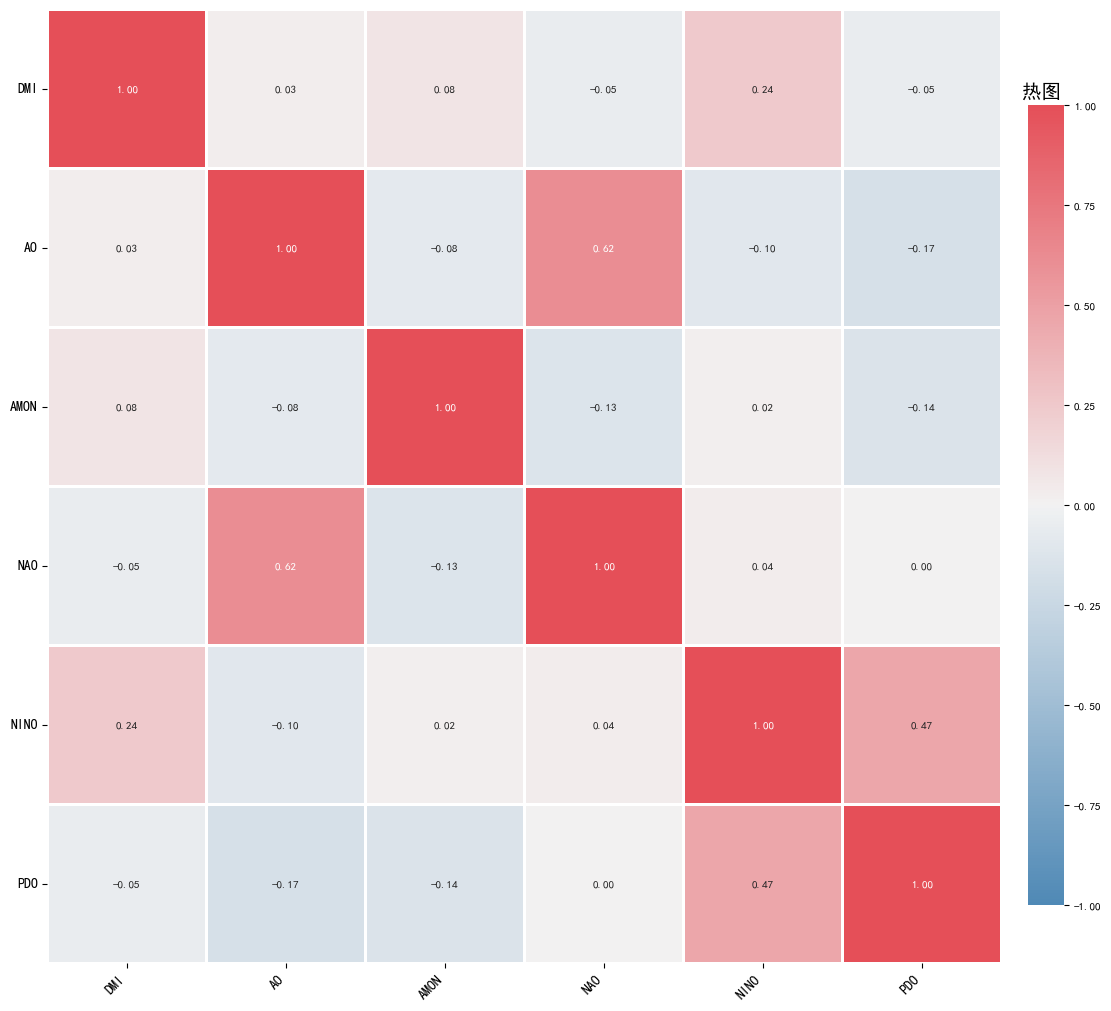

In [112]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # Example: Use SimHei font
plt.rcParams['axes.unicode_minus'] = False 
fig, ax = plt.subplots(figsize=(12, 10), layout='constrained') # <--- 修改点

# 颜色条的位置和大小
cmap_selected = sns.diverging_palette(240, 10, s=70, l=55, n=256, center="light", as_cmap=True)
# 另一个自定义选项示例：更柔和的蓝绿色到橙红色
# cmap_selected = sns.diverging_palette(200, 20, s=60, l=60, n=256, center="light", as_cmap=True)


sns.heatmap(
    cc,
    ax=ax,                                      # 指定主绘图区域
    cbar_ax=fig.add_axes([0.92, 0.1, 0.03, 0.8]),# 手动设置颜色条位置 [左, 下, 宽, 高]
    vmax=1,                                     # 颜色映射的最大值
    vmin=-1,                                    # 颜色映射的最小值
    annot=True,                                 # 在单元格中显示数值
    linewidths=1,                               # 单元格之间的线条宽度
    cmap=cmap_selected,                         # !!! 使用选择的或自定义的色板 !!!
    square=True,                                # 使单元格为方形
    fmt='.2f',                                  # 注释的格式
    cbar_kws={'shrink': 0.8},                   # 颜色条的附加参数
    annot_kws={"size": 8}                       # 调整注释字体大小，以防重叠
)

plt.title("热图 ", fontsize=14) # 标题

# 以下 plt.xticks/yticks 主要作用于刻度位置，标签和旋转由 ax.set_xticklabels/set_yticklabels 设置
# 为保持与您原代码一致，此处保留，但实际效果主要由后续 ax.set_... 控制
plt.xticks(rotation=45)    # x轴标签旋转45度 (此处的旋转会被 ax.set_xticklabels 覆盖)
plt.yticks(rotation=0)     # y轴标签不旋转 (此处的旋转会被 ax.set_yticklabels 覆盖)

# 在指定的 ax 对象上设置刻度标签和旋转角度
# ha='right' 使旋转后的x轴标签右对齐，更美观
ax.set_xticklabels(name, rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(name, rotation=0, fontsize=10) # Y轴标签也可以考虑 ha='right' 如果标签较长
plt.show()

In [17]:
aa = np.ones([874
                  ,1])

In [19]:
aa = 1.63*0.068348*aa

In [21]:
for i in range(1,875):
    GMST2.iloc[i-1,0] = (GMST1.iloc[i+1,0]-GMST1.iloc[i-1,0])/2
    

NameError: name 'GMST1' is not defined

In [23]:
dydtindex = GMST2>=aa
dydtindex.shape

(874, 1)

In [32]:
filtered_index = GMST2.index[dydtindex.iloc[:,0]]
filtered_index

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [36]:
aa = np.ones([874,1])
aa = 1.99*0.068348*aa
dydtindex = GMST2>=aa
dydtindex.shape
plt.figure(figsize=(16,9))

plt.plot(GMST2.index,GMST2,color ='deepskyblue',lw = 1.2)
plt.plot(GMST2.index,aa,color = 'red')
plt.plot( GMST2.index[dydtindex.iloc[:,0]],GMST2[ dydtindex.iloc[:,0]],'ro')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [38]:
np.std(GM)

NameError: name 'GM' is not defined

In [41]:
dydtindex.columns=['0']
dydtindex

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [43]:
new = pd.DataFrame({'0':[0,False]},dtype=bool)
dydtindex2 = pd.concat([dydtindex,new],ignore_index=False,axis = 0)
dydtindex2.index = data.index

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [45]:
dydtindex2 

NameError: name 'dydtindex2' is not defined

In [47]:
# 生成时间索引 (假设从1950年1月开始)
dates = pd.date_range("1950-01", periods=876, freq="MS")
data.index = dates
GMST1.index = dates
# =====================================
# 2. 滤波函数定义
# =====================================
def high_pass_filter(series, cutoff=1/120):
    b, a = signal.butter(4, cutoff, btype='high', fs=12)
    return signal.filtfilt(b, a, series)

def trenberth_smooth(series):
    if np.all(np.isnan(series)):
        return series
    
    valid_mask = ~np.isnan(series)
    ts0 = series[valid_mask]
    
    if len(ts0) == 0:
        return series
    
    weights = np.array([1,6,19,42,71,96,106,96,71,42,19,6,1]) / 576
    pad_size = len(weights) // 2  # 计算填充大小

    # 处理填充
    front_pad = ts0[:pad_size][::-1] if len(ts0) >= pad_size else ts0[::-1]
    end_pad = ts0[-pad_size:][::-1] if len(ts0) >= pad_size else ts0[::-1]
    
    ts_padded = np.concatenate([front_pad, ts0, end_pad])
    
    # 使用 'same' 模式保持输出长度一致
    smoothed = np.convolve(ts_padded, weights, mode='same')
    
    # 仅取回原始数据长度部分
    smoothed = smoothed[pad_size:-pad_size] if len(smoothed) > len(ts0) else smoothed

    smoothed_series = np.full_like(series, np.nan)
    smoothed_series[valid_mask] = smoothed
    
    return smoothed_series

data_filtered = data.apply(high_pass_filter)
data_smoothed = data.apply(trenberth_smooth)

# =====================================
# 3. 可视化设置
# =====================================
plt.rcParams.update({
    'font.sans-serif': 'Arial',
    'axes.labelsize': 9,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'axes.titlesize': 10,
    'figure.constrained_layout.use': True
})

fig, axes = plt.subplots(7, 1, figsize=(12, 21), sharex=True,
                        gridspec_kw={'hspace': 0.05})

# =====================================
# 4. 绘制各指数子图
# =====================================
def plot_climate_index(ax, series, color, label, ylabel, thresholds=None, highlight_indices=None):
    # 绘制原始数据
    ax.plot(series.index, series, color=color, lw=0.8, alpha=0.4)
    # 绘制平滑数据
    ax.plot(series.index, trenberth_smooth(series), 
           color=color, lw=1.2, label=label)
    ax.scatter(series.index[dydtindex2.iloc[:,0]], series[dydtindex2.iloc[:,0]], color='r',marker = 'o', lw=0.8)
    
    # 标注阈值事件
    if thresholds:
        for threshold, color in thresholds.items():
            ax.axhline(threshold, color=color, ls='--', lw=0.8, alpha=0.6)
    
    # 新增：在指定位置添加点标记
    if highlight_indices is not None:
        # 获取时间点和对应的值
        highlight_dates = series.index[highlight_indices]
        highlight_values = series.iloc[highlight_indices]
        ax.scatter(highlight_dates, highlight_values, 
                   color=color, s=20, edgecolor='white', zorder=3, alpha=0.8)

    ax.set_ylabel(ylabel, labelpad=12)
    ax.grid(ls=':', lw=0.5, alpha=0.6)
    ax.legend(loc='upper right', fontsize=7)
highlight_indices = np.array([15, 16, 65, 66, 125, 126, 161, 162, 231, 232, 
                            323, 324, 395, 396, 481, 482, 515, 516, 747, 748, 789, 790])
plot_climate_index(axes[6],GMST1.GMST,'deepskyblue',"GMST","GMST", highlight_indices=highlight_indices)
    
# DMI
plot_climate_index(axes[0], data.DMI, 'purple', 
                  'Dipole Mode Index', 'DMI ', highlight_indices=highlight_indices)

# AO
plot_climate_index(axes[1], data.AO, 'darkgreen', 
                  'Arctic Oscillation', 'AO (hPa)',
                  thresholds={1.0: 'red', -1.0: 'blue'}, highlight_indices=highlight_indices)

# AMON
plot_climate_index(axes[2], data.AMON, 'royalblue', 
                  'Atlantic Meridional Mode', 'AMON ', highlight_indices=highlight_indices)

# NAO
plot_climate_index(axes[3], data.NAO, 'darkorange', 
                  'North Atlantic Oscillation', 'NAO (hPa)',
                  thresholds={2.0: 'red', -2.0: 'blue'}, highlight_indices=highlight_indices)

# NINO3.4
plot_climate_index(axes[4], data.NINO, 'crimson', 
                  'El Niño Index', 'ONI',
                  thresholds={0.5: 'red', -0.5: 'blue'}, highlight_indices=highlight_indices)

# PDO
plot_climate_index(axes[5], data.PDO, 'teal', 
                  'Pacific Decadal Oscillation', 'PDO ', highlight_indices=highlight_indices)

# =====================================
# 5. 坐标轴格式调整
# =====================================
axes[-1].xaxis.set_major_locator(mdates.YearLocator(10))
axes[-1].xaxis.set_minor_locator(mdates.YearLocator(2))
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.setp(axes[-1].get_xticklabels(), rotation=45, ha='right')


datess = pd.date_range(start="1950-01-01", periods=876, freq="MS")

# 输入的索引数组
indices = np.array([15, 16, 65, 66, 125, 126, 161, 162, 231, 232, 
                   323, 324, 395, 396, 481, 482, 515, 516, 747, 748, 789, 790])

# 转换为时间点并生成三个月范围
timestamps = datess[indices]
time_ranges = []
for ts in timestamps:
    start = ts - pd.DateOffset(months=1) if ts > datess[0] else ts
    end = ts + pd.DateOffset(months=1) if ts < datess[-1] else ts
    time_ranges.append((start, end))

# 绘制所有区域
for start, end in time_ranges:
    for ax in axes:
        ax.axvspan(start, end, color="orange", alpha=0.2, zorder=0)

# =====================================
# 6. 保存与显示
# =====================================
plt.suptitle("Climate Indices Time Series (1950-2023)", y=0.995, 
            fontsize=14, fontweight='bold')
plt.savefig('climate_indices.png', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'data' is not defined

In [49]:
aa = np.ones([874,1])
aa = 1.9*0.068348*aa
dydtindex = GMST2>=aa
dydtindex.shape
plt.figure(figsize=(16,9))

plt.plot(GMST2.index,GMST2,color ='deepskyblue',lw = 1.2)
plt.plot(GMST2.index,aa,color = 'red')
plt.plot( GMST2.index[dydtindex.iloc[:,0]],GMST2[ dydtindex.iloc[:,0]],'ro')
plt.show()
dydtindex.columns=['0']
dydtindex
new = pd.DataFrame({'0':[0,False]},dtype=bool)
dydtindex2 = pd.concat([dydtindex,new],ignore_index=False,axis = 0)
dydtindex2.iloc[1:,0]=dydtindex2.iloc[:-1,0] 
dydtindex2.index = data.index
# 生成时间索引 (假设从1950年1月开始)
dates = pd.date_range("1950-01", periods=876, freq="MS")
data.index = dates
GMST1.index = dates
# =====================================
# 2. 滤波函数定义
# =====================================
def high_pass_filter(series, cutoff=1/120):
    b, a = signal.butter(4, cutoff, btype='high', fs=12)
    return signal.filtfilt(b, a, series)

def trenberth_smooth(series):
    if np.all(np.isnan(series)):
        return series
    
    valid_mask = ~np.isnan(series)
    ts0 = series[valid_mask]
    
    if len(ts0) == 0:
        return series
    
    weights = np.array([1,6,19,42,71,96,106,96,71,42,19,6,1]) / 576
    pad_size = len(weights) // 2  # 计算填充大小

    # 处理填充
    front_pad = ts0[:pad_size][::-1] if len(ts0) >= pad_size else ts0[::-1]
    end_pad = ts0[-pad_size:][::-1] if len(ts0) >= pad_size else ts0[::-1]
    
    ts_padded = np.concatenate([front_pad, ts0, end_pad])
    
    # 使用 'same' 模式保持输出长度一致
    smoothed = np.convolve(ts_padded, weights, mode='same')
    
    # 仅取回原始数据长度部分
    smoothed = smoothed[pad_size:-pad_size] if len(smoothed) > len(ts0) else smoothed

    smoothed_series = np.full_like(series, np.nan)
    smoothed_series[valid_mask] = smoothed
    
    return smoothed_series

data_filtered = data.apply(high_pass_filter)
data_smoothed = data.apply(trenberth_smooth)

# =====================================
# 3. 可视化设置
# =====================================
plt.rcParams.update({
    'font.sans-serif': 'Arial',
    'axes.labelsize': 9,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'axes.titlesize': 10,
    'figure.constrained_layout.use': True
})

fig, axes = plt.subplots(7, 1, figsize=(12, 21), sharex=True,
                        gridspec_kw={'hspace': 0.05})

# =====================================
# 4. 绘制各指数子图
# =====================================
def plot_climate_index(ax, series, color, label, ylabel, thresholds=None, highlight_indices=None):
    # 绘制原始数据
    ax.plot(series.index, series, color=color, lw=0.8, alpha=0.4)
    # 绘制平滑数据
    ax.plot(series.index, trenberth_smooth(series), 
           color=color, lw=1.2, label=label)
    ax.scatter(series.index[dydtindex2.iloc[:,0]], series[dydtindex2.iloc[:,0]], color='r',marker = 'o', lw=0.8)
    
    # 标注阈值事件
    if thresholds:
        for threshold, color in thresholds.items():
            ax.axhline(threshold, color=color, ls='--', lw=0.8, alpha=0.6)
    
    # 新增：在指定位置添加点标记
    if highlight_indices is not None:
        # 获取时间点和对应的值
        highlight_dates = series.index[highlight_indices]
        highlight_values = series.iloc[highlight_indices]
        ax.scatter(highlight_dates, highlight_values, 
                   color=color, s=20, edgecolor='white', zorder=3, alpha=0.8)

    ax.set_ylabel(ylabel, labelpad=12)
    ax.grid(ls=':', lw=0.5, alpha=0.6)
    ax.legend(loc='upper right', fontsize=7)
highlight_indices = np.array([15, 16, 65, 66, 125, 126, 161, 162, 231, 232, 
                            323, 324, 395, 396, 481, 482, 515, 516, 747, 748, 789, 790])
plot_climate_index(axes[6],GMST1.GMST,'deepskyblue',"GMST","GMST", highlight_indices=highlight_indices)
    
# DMI
plot_climate_index(axes[0], data.DMI, 'purple', 
                  'Dipole Mode Index', 'DMI ', highlight_indices=highlight_indices)

# AO
plot_climate_index(axes[1], data.AO, 'darkgreen', 
                  'Arctic Oscillation', 'AO (hPa)',
                  thresholds={1.0: 'red', -1.0: 'blue'}, highlight_indices=highlight_indices)

# AMON
plot_climate_index(axes[2], data.AMON, 'royalblue', 
                  'Atlantic Meridional Mode', 'AMON ', highlight_indices=highlight_indices)

# NAO
plot_climate_index(axes[3], data.NAO, 'darkorange', 
                  'North Atlantic Oscillation', 'NAO (hPa)',
                  thresholds={2.0: 'red', -2.0: 'blue'}, highlight_indices=highlight_indices)

# NINO3.4
plot_climate_index(axes[4], data.NINO, 'crimson', 
                  'El Niño Index', 'ONI',
                  thresholds={0.5: 'red', -0.5: 'blue'}, highlight_indices=highlight_indices)

# PDO
plot_climate_index(axes[5], data.PDO, 'teal', 
                  'Pacific Decadal Oscillation', 'PDO ', highlight_indices=highlight_indices)

# =====================================
# 5. 坐标轴格式调整
# =====================================
axes[-1].xaxis.set_major_locator(mdates.YearLocator(10))
axes[-1].xaxis.set_minor_locator(mdates.YearLocator(2))
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.setp(axes[-1].get_xticklabels(), rotation=45, ha='right')


datess = pd.date_range(start="1950-01-01", periods=876, freq="MS")

# 输入的索引数组
indices = np.array([15, 16, 65, 66, 125, 126, 161, 162, 231, 232, 
                   323, 324, 395, 396, 481, 482, 515, 516, 747, 748, 789, 790])

# 转换为时间点并生成三个月范围
timestamps = datess[indices]
time_ranges = []
for ts in timestamps:
    start = ts - pd.DateOffset(months=1) if ts > datess[0] else ts
    end = ts + pd.DateOffset(months=1) if ts < datess[-1] else ts
    time_ranges.append((start, end))

# 绘制所有区域
for start, end in time_ranges:
    for ax in axes:
        ax.axvspan(start, end, color="orange", alpha=0.2, zorder=0)

# =====================================
# 6. 保存与显示
# =====================================
plt.suptitle("Climate Indices Time Series (1950-2023)", y=0.995, 
            fontsize=14, fontweight='bold')
plt.savefig('climate_indices.png', dpi=300, bbox_inches='tight')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [51]:
dydtindex2

NameError: name 'dydtindex2' is not defined

In [84]:
dgmst_6_idx1_6

NameError: name 'dgmst_6_idx1_6' is not defined